In [1]:
%matplotlib inline

In [2]:
from vqa_model import *

Using Theano backend.


## Load the questions 

In [3]:
questions_path = '../../data/OpenEnded_mscoco_val2014_questions.json'

In [4]:
questions = load_questions(questions_path)

In [5]:
question = questions[0]
print question

{u'image_id': 350623, u'question': u'What is the table made of?', u'question_id': 3506232}


## Path to preprocessed questions and images

In [6]:
qpath = '../../data/preprocessed_questions/'
impath = '../../data/preprocessed_val2014/'

### Compute features for a given image

In [7]:
Xq = get_quest_features(question, qpath)
Xim = get_im_features(question, impath)
X = [Xq, Xim]

## Load the model

In [8]:
VQA_model_file_name      = '../../experiments/VQA_Demo/models/VQA/VQA_MODEL.json'
VQA_weights_file_name   = '../../experiments/VQA_Demo/models/VQA/VQA_MODEL_WEIGHTS.hdf5'

In [9]:
model_vqa = get_VQA_model(VQA_model_file_name, VQA_weights_file_name)

## Predict the output of the model and define the array of possible outcomes

In [10]:
y_output = model_vqa.predict(X)

In [11]:
label_encoder_file_name  = '../../experiments/VQA_Demo/models/VQA/FULL_labelencoder_trainval.pkl_01.npy'
labelencoder = np.load(label_encoder_file_name)

## Visualize the image and the answer

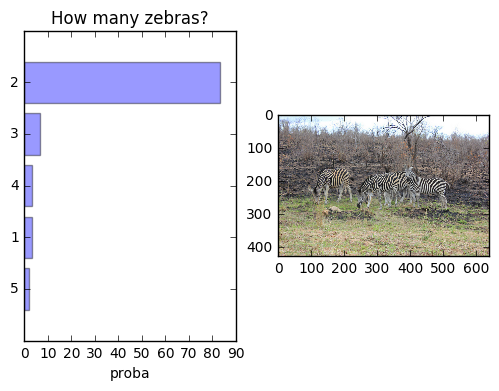

In [34]:
plot_question_im_answ(question, y_output, labelencoder)

## We are going to score all the questions from the dataset

In [14]:
#progressbar
from tqdm import tqdm_notebook

In [ ]:
results = []
for question in tqdm_notebook(questions):
    Xq = get_quest_features(question, qpath)
    Xim = get_im_features(question, impath)
    X = [Xq, Xim]
    y_output = model_vqa.predict(X)
    ans = str(labelencoder[np.argmax(y_output)])
    results.append({"answer": ans, "question_id": question['question_id']})

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/home/max/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/max/anaconda2/lib/python2.7/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/home/max/anaconda2/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [35]:
#save ou results, we are going to reuse them leter for the evaluation of performance
path_to_results = "../../data/results_val.json"
with open(path_to_results, 'w') as outfile:
    json.dump(results, outfile)